In [151]:
# The code you provided is used to mount your Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
# important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import warnings

In [153]:
# reading the csv file
df = pd.read_csv('/content/drive/MyDrive/YHills/h1n1_vaccine_prediction.csv')

In [154]:
# displaying the first 5 dataset values
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [155]:
# it is used to obtain the shape of dataset
df.shape

(26707, 34)

In [156]:
# calculates the number of missing values (NaN or null values) in each column
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [157]:
# This code is used to fill missing values with 0 for the columns 'no_of_adults', 'no_of_children', 'has_health_insur', and 'is_health_worker' in the dataset
df['no_of_adults'].fillna(0, inplace=True)
df['no_of_children'].fillna(0, inplace=True)
df['has_health_insur'].fillna(0, inplace=True)
df['is_health_worker'].fillna(0, inplace=True)

In [158]:
# his code is used to fill the missing values in specific columns of the dataset with default values.
df['employment'].fillna('Unemployed', inplace=True)
df['marital_status'].fillna('Unknown', inplace=True)
df['housing_status'].fillna('Unknown', inplace=True)
df['income_level'].fillna('<= $75,000, Above Poverty', inplace=True)
df['qualification'].fillna('Not Mention', inplace=True)

In [159]:
# For the 'sick_from_seas_vacc' column, since it contains values from 1 to 5, it seems to represent some kind of ordinal categorical data.
# For ordinal data, using the median for imputation would be a more appropriate choice compared to mean or mode.
df['sick_from_seas_vacc'].replace('', pd.NA, inplace=True)
df['sick_from_seas_vacc'].fillna(df['sick_from_seas_vacc'].median(), inplace=True)


In [160]:
# For the 'is_seas_vacc_effective' column, since it contains values from 1 to 5, it seems to represent some kind of ordinal categorical data.
# For ordinal data, using the median for imputation would be a more appropriate choice compared to mean or mode.
df['is_seas_vacc_effective'].replace('', pd.NA, inplace=True)
df['is_seas_vacc_effective'].fillna(df['is_seas_vacc_effective'].median(), inplace=True)

In [161]:
# For the 'is_seas_risky' column, since it contains values from 1 to 5, it seems to represent some kind of ordinal categorical data.
# For ordinal data, using the median for imputation would be a more appropriate choice compared to mean or mode.
df['is_seas_risky'].replace('', pd.NA, inplace=True)
df['is_seas_risky'].fillna(df['is_seas_risky'].median(), inplace=True)

In [162]:
# For the 'sick_from_h1n1_vacc' column, since it contains values from 1 to 5, it seems to represent some kind of ordinal categorical data.
# For ordinal data, using the median for imputation would be a more appropriate choice compared to mean or mode.
df['sick_from_h1n1_vacc'].replace('', pd.NA, inplace=True)
df['sick_from_h1n1_vacc'].fillna(df['sick_from_h1n1_vacc'].median(), inplace=True)

In [163]:
# For the 'is_h1n1_risky' column, since it contains values from 1 to 5, it seems to represent some kind of ordinal categorical data.
# For ordinal data, using the median for imputation would be a more appropriate choice compared to mean or mode.
df['is_h1n1_risky'].replace('', pd.NA, inplace=True)
df['is_h1n1_risky'].fillna(df['is_h1n1_risky'].median(), inplace=True)

In [164]:
# For the 'is_h1n1_vacc_effective' column, since it contains values from 1 to 5, it seems to represent some kind of ordinal categorical data.
# For ordinal data, using the median for imputation would be a more appropriate choice compared to mean or mode.
df['is_h1n1_vacc_effective'].replace('', pd.NA, inplace=True)
df['is_h1n1_vacc_effective'].fillna(df['is_h1n1_vacc_effective'].median(), inplace=True)

In [165]:
# agaion same fillna is used to fill missing values with 0
df['cont_child_undr_6_mnths'].fillna(0, inplace=True)
df['chronic_medic_condition'].fillna(0, inplace=True)
df['dr_recc_seasonal_vacc'].fillna(0, inplace=True)
df['dr_recc_h1n1_vacc'].fillna(0, inplace=True)
df['avoid_touch_face'].fillna(0, inplace=True)
df['reduced_outside_home_cont'].fillna(0, inplace=True)
df['avoid_large_gatherings'].fillna(0, inplace=True)
df['wash_hands_frequently'].fillna(0, inplace=True)
df['bought_face_mask'].fillna(0, inplace=True)
df['contact_avoidance'].fillna(0, inplace=True)
df['antiviral_medication'].fillna(0, inplace=True)

In [166]:
# For the 'h1n1_worry' column, since it contains values from 1 to 3, it seems to represent some kind of ordinal categorical data.
# For ordinal data, using the median for imputation would be a more appropriate choice compared to mean or mode.
df['h1n1_worry'].replace('', pd.NA, inplace=True)
df['h1n1_worry'].fillna(df['h1n1_worry'].median(), inplace=True)

In [167]:
# For the 'h1n1_awareness' column, since it contains values from 1 to 3, it seems to represent some kind of ordinal categorical data.
# For ordinal data, using the median for imputation would be a more appropriate choice compared to mean or mode.
df['h1n1_awareness'].replace('', pd.NA, inplace=True)
df['h1n1_awareness'].fillna(df['h1n1_awareness'].median(), inplace=True)

In [168]:
df.drop('unique_id', axis=1, inplace=True)

In [169]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [ ]:
# Convert columns to categorical data
df['income_level'] = df['income_level'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['housing_status'] = df['housing_status'].astype('category')
df['employment'] = df['employment'].astype('category')
df['census_msa'] = df['census_msa'].astype('category')
df['age_bracket'] = df['age_bracket'].astype('category')
df['qualification'] = df['qualification'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')

# Label encoding for categorical columns
df['income_level'] = df['income_level'].cat.codes
df['marital_status'] = df['marital_status'].cat.codes
df['housing_status'] = df['housing_status'].cat.codes
df['employment'] = df['employment'].cat.codes
df['census_msa'] = df['census_msa'].cat.codes
df['age_bracket'] = df['age_bracket'].cat.codes
df['qualification'] = df['qualification'].cat.codes
df['race'] = df['race'].cat.codes
df['sex'] = df['sex'].cat.codes

**income_level:**

---
The different income levels will be
assigned numerical values, for example, 'Above Poverty' might be encoded as 0, 'Below Poverty' as 1, and '> $75,000' as 2.

**marital_status:**

---
The different marital statuses will be assigned numerical values, for example, 'Not Married' might be encoded as 0, 'Married' as 1, and 'Unknown' as 2.

**housing_status: **

---
The different housing statuses will be assigned numerical values, for example, 'Own' might be encoded as 0, 'Rent' as 1, and 'Unknown' as 2.

**employment:**

---
The different employment statuses will be assigned numerical values, for example, 'Not in Labor Force' might be encoded as 0, 'Employed' as 1, and 'Unemployed' as 2.

**census_msa:**

---
The different census MSA categories will be assigned numerical values, for example, 'MSA, Principle City' might be encoded as 0, 'Non-MSA' as 1.

**age_bracket:**

---
The different age brackets will be assigned numerical values based on their ordering, for example, '18 - 34 Years' might be encoded as 0, '35 - 44 Years' as 1, and so on.

**qualification:**

---
The different qualifications will be assigned numerical values based on their ordering, for example, '< 12 Years' might be encoded as 0, 'Some College' as 1, 'College Graduate' as 2, and 'Not Mention' as 3.

**sex:**

---
The different genders will be assigned numerical values, for example, 'Female' might be encoded as 0 and 'Male' as 1.

**FOLLOWING BLOKS SHOWS THAT ALL CATGOTIAL DATA HAS BEEN CONVERTED TO NUMERIC DATA**

In [ ]:
qualification_counts = df['qualification'].value_counts()
print(qualification_counts)

2    10097
4     7043
0     5797
1     2363
3     1407
Name: qualification, dtype: int64


In [ ]:
age_counts = df['age_bracket'].value_counts()
print(age_counts)

4    6843
3    5563
2    5238
0    5215
1    3848
Name: age_bracket, dtype: int64


In [ ]:
race_counts = df['race'].value_counts()
print(race_counts)

3    21222
0     2118
1     1755
2     1612
Name: race, dtype: int64


In [ ]:
sex_counts = df['sex'].value_counts()
print(sex_counts)

0    15858
1    10849
Name: sex, dtype: int64


In [ ]:
income_counts = df['income_level'].value_counts()
print(income_counts)

0    17200
1     6810
2     2697
Name: income_level, dtype: int64


In [ ]:
marital_status_counts = df['marital_status'].value_counts()
print(marital_status_counts)

0    13555
1    11744
2     1408
Name: marital_status, dtype: int64


In [ ]:
housing_status_counts = df['housing_status'].value_counts()
print(housing_status_counts)

0    18736
1     5929
2     2042
Name: housing_status, dtype: int64


In [ ]:
employment_counts = df['employment'].value_counts()
print(employment_counts)

0    13560
1    10231
2     2916
Name: employment, dtype: int64


In [ ]:
census_msa_counts = df['census_msa'].value_counts()
print(census_msa_counts)

0    11645
1     7864
2     7198
Name: census_msa, dtype: int64


**visulization**

In [ ]:
colors = sns.color_palette('pastel')

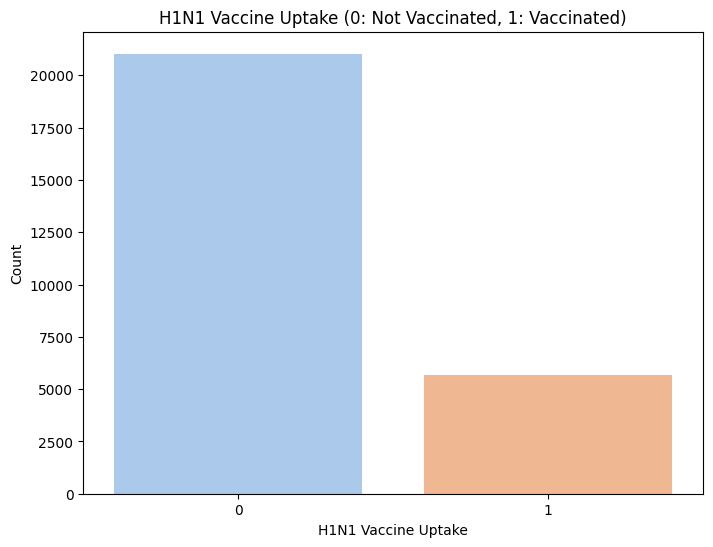

In [ ]:
# Bar Chart for H1N1 Vaccine Uptake
plt.figure(figsize=(8, 6))
sns.countplot(x='h1n1_vaccine', data=df, palette=colors)
plt.xlabel('H1N1 Vaccine Uptake')
plt.ylabel('Count')
plt.title('H1N1 Vaccine Uptake (0: Not Vaccinated, 1: Vaccinated)')
plt.show()

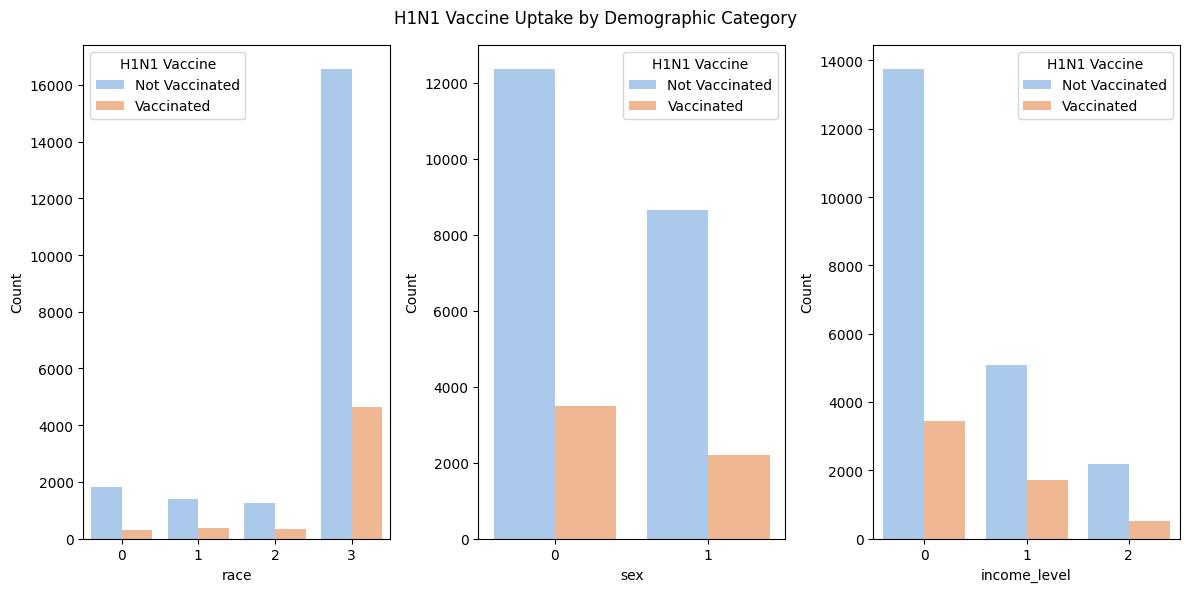

In [ ]:
# Bar Chart for H1N1 Vaccine Uptake by Demographic Category
demographic_columns = ['race', 'sex', 'income_level']
plt.figure(figsize=(12, 6))
for i, col in enumerate(demographic_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, hue='h1n1_vaccine', data=df, palette=colors)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='H1N1 Vaccine', labels=['Not Vaccinated', 'Vaccinated'])
plt.suptitle('H1N1 Vaccine Uptake by Demographic Category')
plt.tight_layout()
plt.show()

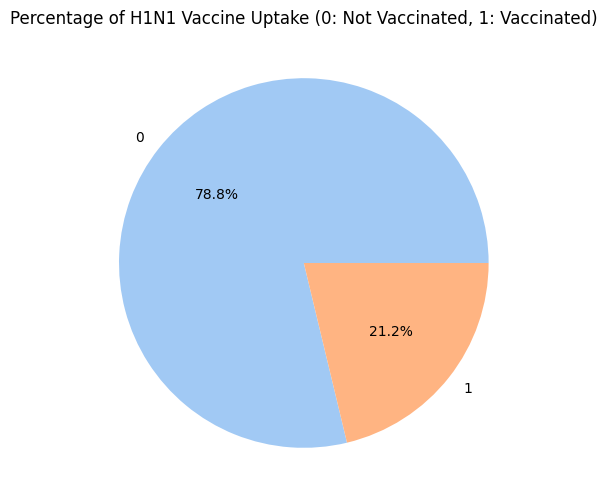

In [ ]:
# Pie Chart for Percentage of H1N1 Vaccine Uptake
plt.figure(figsize=(6, 6))
df['h1n1_vaccine'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Percentage of H1N1 Vaccine Uptake (0: Not Vaccinated, 1: Vaccinated)')
plt.ylabel('')
plt.show()

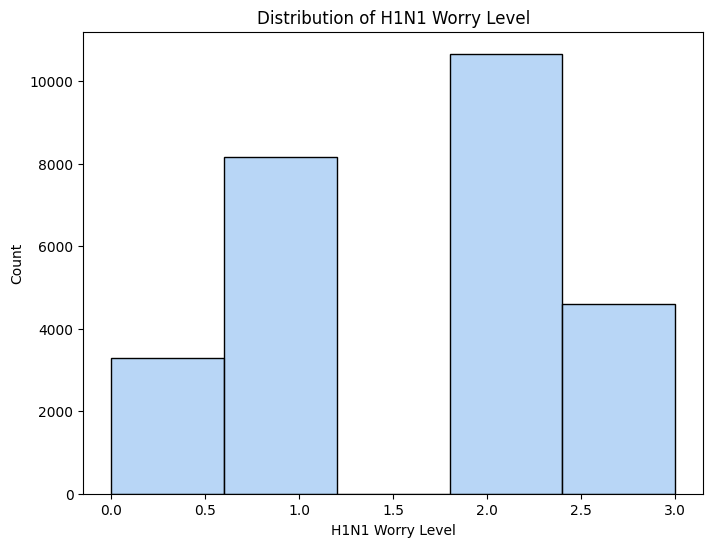

In [ ]:
# Histogram for H1N1 Worry Level
plt.figure(figsize=(8, 6))
sns.histplot(df['h1n1_worry'], bins=5, color=colors[0])
plt.xlabel('H1N1 Worry Level')
plt.ylabel('Count')
plt.title('Distribution of H1N1 Worry Level')
plt.show()

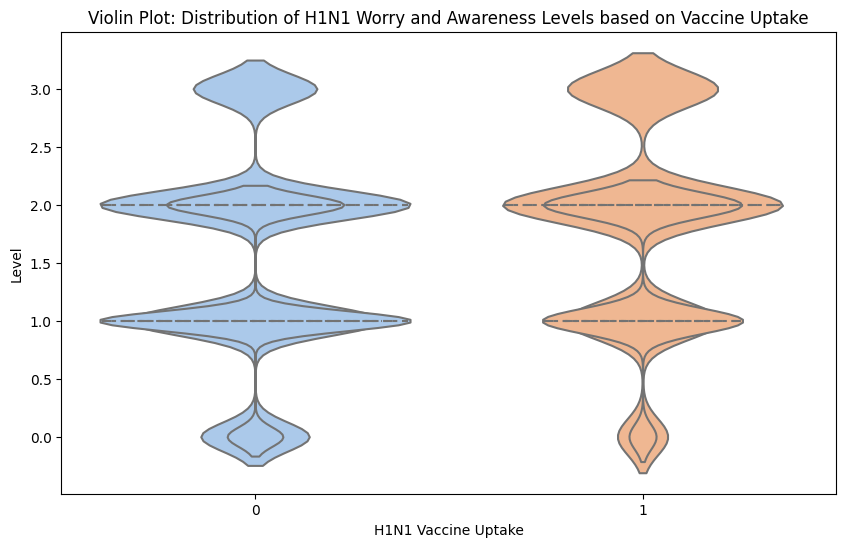

In [ ]:
# Violin Plot for Distribution of H1N1 Worry and Awareness Levels based on Vaccine Uptake
plt.figure(figsize=(10, 6))
sns.violinplot(x='h1n1_vaccine', y='h1n1_worry', data=df, inner='quart', palette=colors)
sns.violinplot(x='h1n1_vaccine', y='h1n1_awareness', data=df, inner='quart', palette=colors)
plt.xlabel('H1N1 Vaccine Uptake')
plt.ylabel('Level')
plt.title('Violin Plot: Distribution of H1N1 Worry and Awareness Levels based on Vaccine Uptake')
plt.show()

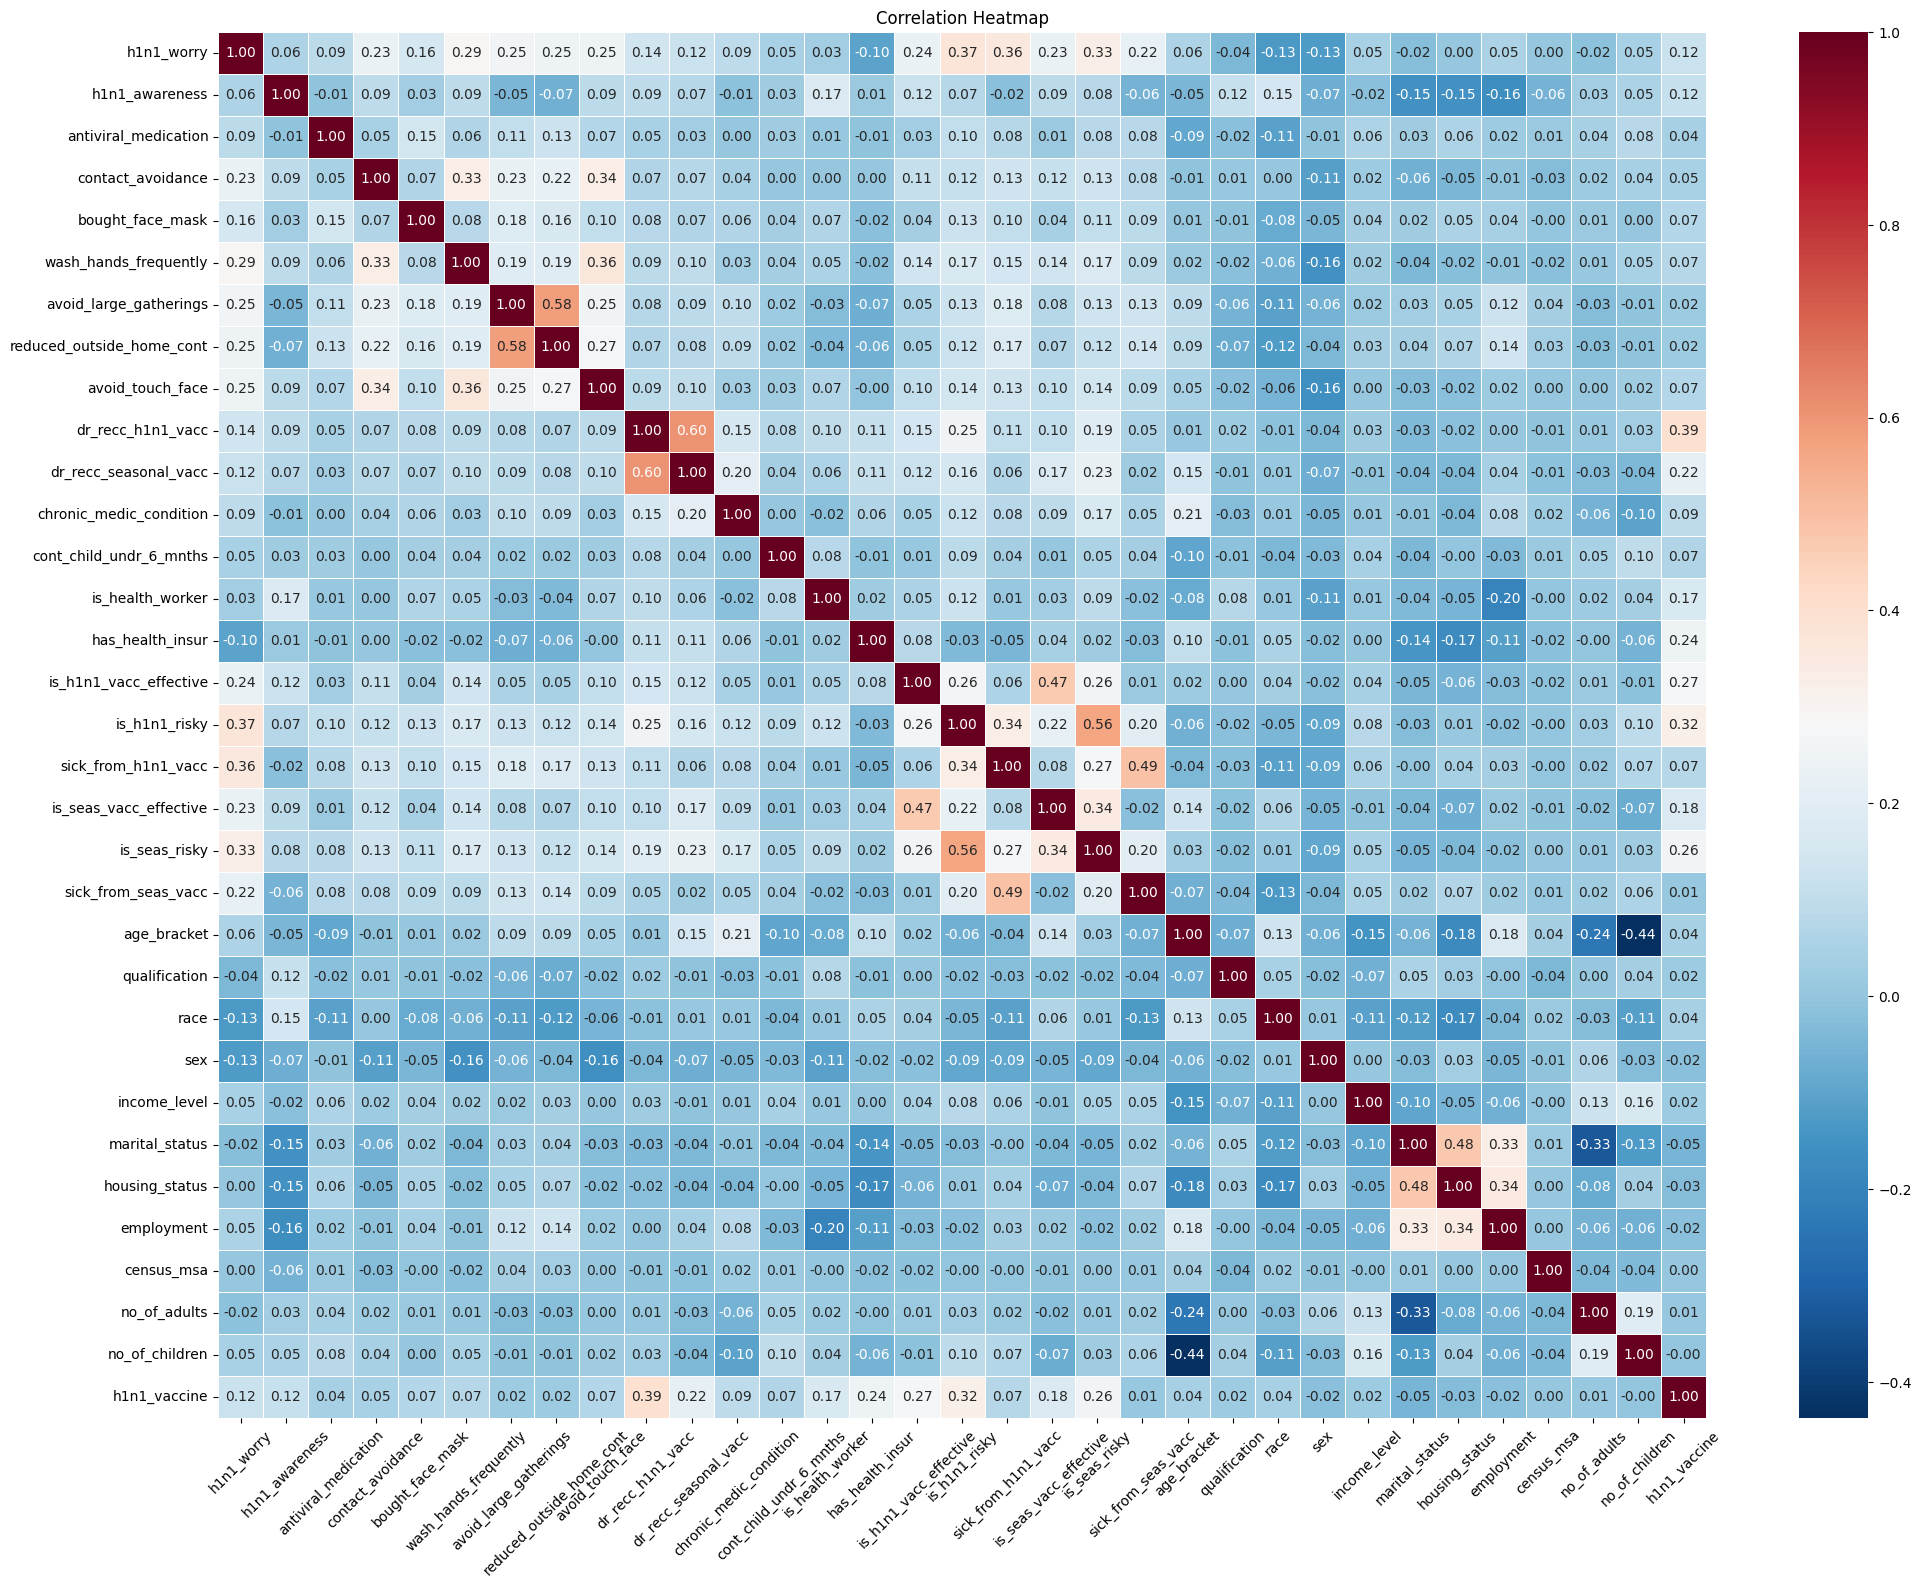

In [ ]:
# Heatmap for Correlation between Features
plt.figure(figsize=(24, 18))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

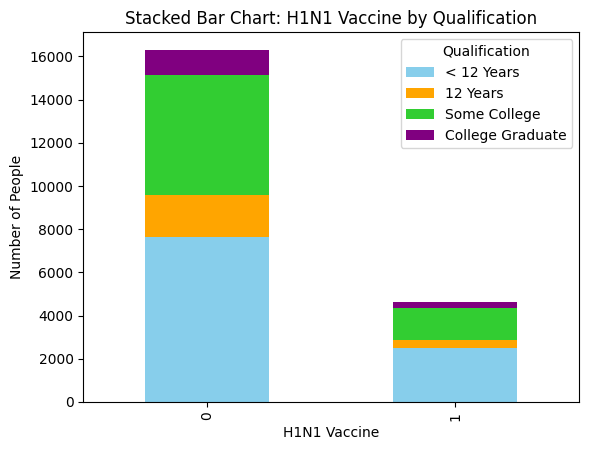

In [ ]:
# Define the mapping dictionary for 'qualification' codes to their original names
qualification_mapping = {
    1: '< 12 Years',
    2: '12 Years',
    3: 'Some College',
    4: 'College Graduate',
    5: 'Not Mention'
}

df_with_original_names = df.copy()
df_with_original_names['qualification'] = df['qualification'].map(qualification_mapping)
cross_tab = pd.crosstab(df_with_original_names['h1n1_vaccine'], df_with_original_names['qualification'])
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'orange', 'limegreen', 'purple', 'yellow'])
plt.xlabel('H1N1 Vaccine')
plt.ylabel('Number of People')
plt.title('Stacked Bar Chart: H1N1 Vaccine by Qualification')
plt.legend(title='Qualification', labels=qualification_mapping.values())
plt.show()

# Models

In [ ]:
X = df.drop('h1n1_vaccine', axis=1)
y = df['h1n1_vaccine']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression Classifier**

In [ ]:
param_grid = {'C': [0.1, 1, 10]}
logistic_model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
logistic_model_tuned = LogisticRegression(C=best_params['C'], max_iter=1000)
logistic_model_tuned.fit(X_train, y_train)
y_pred_logistic = logistic_model_tuned.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_recall_fscore_support_logistic = precision_recall_fscore_support(y_test, y_pred_logistic, average='weighted')
classification_report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classifier Accuracy: {:.2f}%".format(accuracy_logistic * 100))
print("Logistic Regression Classifier Classification Report:")
print(classification_report_logistic)

Logistic Regression Classifier Accuracy: 85.29%
Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4212
           1       0.73      0.48      0.58      1130

    accuracy                           0.85      5342
   macro avg       0.80      0.72      0.75      5342
weighted avg       0.84      0.85      0.84      5342



**K-Nearest Neighbors Classifier**

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
knn_model_tuned.fit(X_train, y_train)
y_pred_knn = knn_model_tuned.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_recall_fscore_support_knn = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')
classification_report_knn = classification_report(y_test, y_pred_knn)
print("K-Nearest Neighbors Classifier Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("K-Nearest Neighbors Classifier Classification Report:")
print(classification_report_knn)

K-Nearest Neighbors Classifier Accuracy: 82.16%
K-Nearest Neighbors Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4212
           1       0.67      0.32      0.43      1130

    accuracy                           0.82      5342
   macro avg       0.75      0.64      0.66      5342
weighted avg       0.80      0.82      0.80      5342



**Random Forest Classifier**

In [ ]:
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 5, 10, 20]}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
rf_model_tuned = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf_model_tuned.fit(X_train, y_train)
y_pred_rf = rf_model_tuned.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_recall_fscore_support_rf = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("Random Forest Classifier Classification Report:")
print(classification_report_rf)

Random Forest Classifier Accuracy: 85.19%
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4212
           1       0.75      0.45      0.56      1130

    accuracy                           0.85      5342
   macro avg       0.81      0.71      0.74      5342
weighted avg       0.84      0.85      0.84      5342



**AdaBoost Classifier**

In [ ]:
param_grid_ada = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.1, 0.5, 1.0, 2.0]}
ada_model = AdaBoostClassifier()
grid_search_ada = GridSearchCV(ada_model, param_grid_ada, cv=5)
grid_search_ada.fit(X_train, y_train)
best_params_ada = grid_search_ada.best_params_
final_ada_model = AdaBoostClassifier(n_estimators=best_params_ada['n_estimators'],
                                     learning_rate=best_params_ada['learning_rate'])
final_ada_model.fit(X_train, y_train)
y_pred_ada = final_ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
classification_report_ada = classification_report(y_test, y_pred_ada)
print("AdaBoost Classifier Accuracy: {:.2f}%".format(accuracy_ada * 100))
print("AdaBoost Classifier Classification Report:")
print(classification_report_ada)

AdaBoost Classifier Accuracy: 85.59%
AdaBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4212
           1       0.75      0.48      0.59      1130

    accuracy                           0.86      5342
   macro avg       0.81      0.72      0.75      5342
weighted avg       0.85      0.86      0.84      5342



**Gradient Boosting Classifier**

In [ ]:
param_grid_gb = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.01, 0.1, 0.5, 1.0],
                 'max_depth': [3, 5, 7]}
gb_model = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
final_gb_model = GradientBoostingClassifier(n_estimators=best_params_gb['n_estimators'],
                                            learning_rate=best_params_gb['learning_rate'],
                                            max_depth=best_params_gb['max_depth'])
final_gb_model.fit(X_train, y_train)
y_pred_gb = final_gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy: {:.2f}%".format(accuracy_gb * 100))
print("Gradient Boosting Classifier Classification Report:")
print(classification_report_gb)

Gradient Boosting Classifier Accuracy: 85.77%
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4212
           1       0.74      0.51      0.60      1130

    accuracy                           0.86      5342
   macro avg       0.81      0.73      0.76      5342
weighted avg       0.85      0.86      0.85      5342



**Gaussian Naive Bayes Classifier**

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_recall_fscore_support_nb = precision_recall_fscore_support(y_test, y_pred_nb, average='weighted')
classification_report_nb = classification_report(y_test, y_pred_nb)
print("Gaussian Naive Bayes Classifier Accuracy: {:.2f}%".format(accuracy_nb * 100))
print("Gaussian Naive Bayes Classifier Classification Report:")
print(classification_report_nb)

Gaussian Naive Bayes Classifier Accuracy: 79.11%
Gaussian Naive Bayes Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4212
           1       0.50      0.63      0.56      1130

    accuracy                           0.79      5342
   macro avg       0.70      0.73      0.71      5342
weighted avg       0.81      0.79      0.80      5342



**Decision Tree Classifier**

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params_dt = grid_search.best_params_
dt_model = DecisionTreeClassifier(**best_params_dt)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_recall_fscore_support_dt = precision_recall_fscore_support(y_test, y_pred_dt, average='weighted')
classification_report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(accuracy_dt * 100))
print("Decision Tree Classifier Classification Report:")
print(classification_report_dt)

Decision Tree Classifier Accuracy: 84.63%
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4212
           1       0.70      0.48      0.57      1130

    accuracy                           0.85      5342
   macro avg       0.79      0.71      0.74      5342
weighted avg       0.83      0.85      0.83      5342



Overall, the **Gradient Boosting Classifier** appears to be the best model for this dataset, as it has the highest accuracy and a good F1-score for the positive class.

In [ ]:
# Take user input for the feature values
user_input_data = {
    'h1n1_worry': [1, 3],
    'h1n1_awareness': [0, 2],
    'antiviral_medication': [0, 0],
    'contact_avoidance': [0, 1],
    'bought_face_mask': [0, 0],
    'wash_hands_frequently': [0, 1],
    'avoid_large_gatherings': [1, 1],
    'reduced_outside_home_cont': [1, 1],
    'avoid_touch_face': [0, 0],
    'dr_recc_h1n1_vacc': [0, 0],
    'dr_recc_seasonal_vacc': [0, 0],
    'chronic_medic_condition': [0, 0],
    'cont_child_undr_6_mnths': [0, 0],
    'is_health_worker': [1, 1],
    'has_health_insur': [1, 1],
    'is_h1n1_vacc_effective': [0, 0],
    'is_h1n1_risky': [0, 0],
    'sick_from_h1n1_vacc': [1, 1],
    'is_seas_vacc_effective': [2, 4],
    'is_seas_risky': [2, 4],
    'sick_from_seas_vacc': [1, 2],
    'age_bracket': ['55 - 64 Years', '35 - 44 Years'],
    'qualification': ['< 12 Years', '12 Years'],
    'race': ['White', 'White'],
    'sex': ['Female', 'Male'],
    'income_level': ['Below Poverty', 'Below Poverty'],
    'marital_status': ['Not Married', 'Not Married'],
    'housing_status': ['Own', 'Rent'],
    'employment': ['Not in Labor Force', 'Employed'],
    'census_msa': ['Non-MSA', 'MSA, Principle City'],
    'no_of_adults': [0, 0],
    'no_of_children': [0, 0]
}

# Convert user input to a DataFrame
user_input_df = pd.DataFrame(user_input_data)

# Perform label encoding for categorical columns
user_input_df['age_bracket'] = user_input_df['age_bracket'].astype('category').cat.codes
user_input_df['qualification'] = user_input_df['qualification'].astype('category').cat.codes
user_input_df['race'] = user_input_df['race'].astype('category').cat.codes
user_input_df['sex'] = user_input_df['sex'].astype('category').cat.codes
user_input_df['income_level'] = user_input_df['income_level'].astype('category').cat.codes
user_input_df['marital_status'] = user_input_df['marital_status'].astype('category').cat.codes
user_input_df['housing_status'] = user_input_df['housing_status'].astype('category').cat.codes
user_input_df['employment'] = user_input_df['employment'].astype('category').cat.codes
user_input_df['census_msa'] = user_input_df['census_msa'].astype('category').cat.codes

# Make predictions on the user input data using TRAINED GRADIENT BOOSTIN CLASSIFIER MODEL
predictions = final_gb_model.predict(user_input_df)
print("Predictions : ",predictions)

Predictions :  [0 0]



---
# -By DHRUV SHETH

---
